In [1]:
######################## ANALYSE EXPLORATOIRE #########################
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Style visuel
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

In [3]:
# Chargement du dataset nettoyé et normalisé
df = pd.read_csv("../data/processed/prepared_dataset_normalized.csv")

In [4]:
# Aperçu rapide
print("Aperçu des données :")
display(df.head())

print("\nDimensions :", df.shape)

Aperçu des données :


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,0,0,1,0,...,-1.161694,-0.994194,0,0,0,0,0,0,1,0
1,1,0,0,0,0.064303,1,0,1,0,1,...,-0.260878,-0.173740,0,0,0,1,0,0,0,1
2,1,0,0,0,-1.239504,1,0,1,1,0,...,-0.363923,-0.959649,1,0,0,0,0,0,0,1
3,1,0,0,0,0.512486,0,0,1,0,1,...,-0.747850,-0.195248,0,0,0,1,0,0,0,0
4,0,0,0,0,-1.239504,1,0,0,0,0,...,0.196178,-0.940457,1,1,0,0,0,0,1,0



Dimensions : (7032, 24)


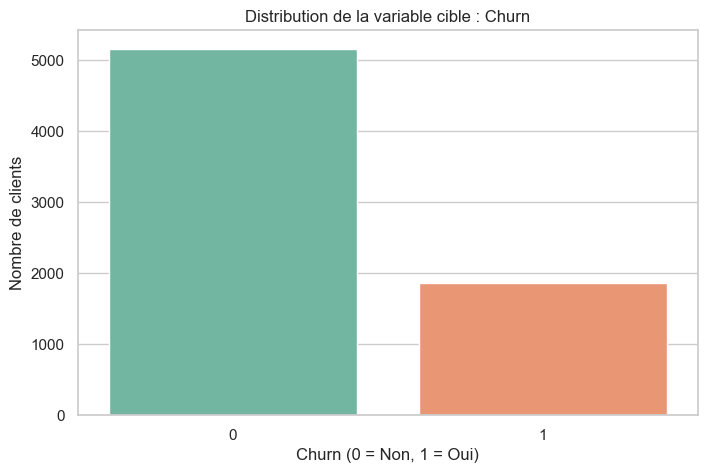

Répartition du churn (%):
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64
Environ 26.6% des clients ont quitté l’entreprise, soit 1 client sur 3.8.


In [19]:
# Distribution du churn (0 = Non, 1 = Oui)
sns.countplot(data=df, x="Churn", hue="Churn", palette="Set2", legend=False)
plt.title("Distribution de la variable cible : Churn")
plt.xlabel("Churn (0 = Non, 1 = Oui)")
plt.ylabel("Nombre de clients")
plt.show()

# Pourcentage de churn
churn_rate = df["Churn"].value_counts(normalize=True) * 100
print("Répartition du churn (%):")
print(churn_rate)
print(f"Environ {round(churn_rate[1], 1)}% des clients ont quitté l’entreprise, soit 1 client sur {round(100/churn_rate[1], 1)}.")

In [8]:
### 73.5% des clients sont restés (Churn = 0)
### 26.5% des clients ont churné (Churn = 1)

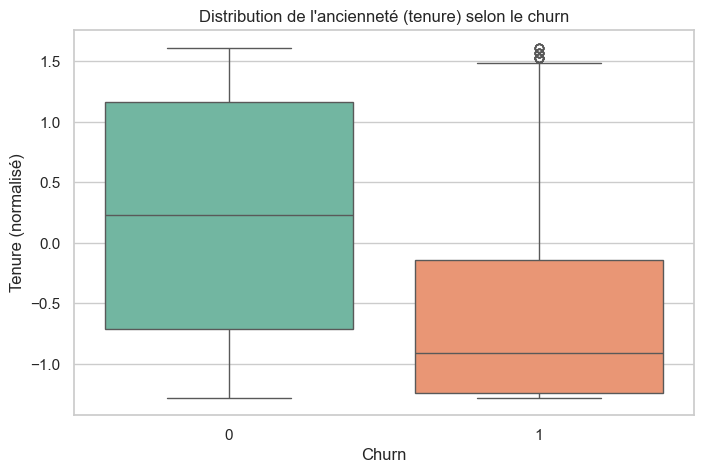


Ancienneté moyenne :
Churn
0    0.213019
1   -0.588451
Name: tenure, dtype: float64
Les clients churnés ont une ancienneté bien plus faible. Ils quittent l'entreprise tôt dans le cycle client.


In [21]:
# Boxplot : Tenure selon Churn
sns.boxplot(x="Churn", y="tenure", data=df, hue="Churn", palette="Set2", legend=False)
plt.title("Distribution de l'ancienneté (tenure) selon le churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (normalisé)")
plt.show()

# Moyenne
tenure_means = df.groupby("Churn")["tenure"].mean()
print("\nAncienneté moyenne :")
print(tenure_means)

print("Les clients churnés ont une ancienneté bien plus faible. Ils quittent l'entreprise tôt dans le cycle client.")

In [18]:
summary = df.groupby("Churn")["tenure"].describe()
print(summary)

# CHURN = 0
# mean => 0,21 > 0 
# 75% => 1,16 
# => beaucoup de clients restés ont une ancienneté supérieure à la moyenne.

# CHURN = 1
# mean = -0,59 < 0
# 25% => -1,23
# => un quart des churners sont parmi les plus récents clients/ majoritairement des clients récents

        count      mean       std       min       25%       50%       75%  \
Churn                                                                       
0      5163.0  0.213019  0.980990 -1.280248 -0.709833  0.227279  1.164390   
1      1869.0 -0.588451  0.795775 -1.280248 -1.239504 -0.913552 -0.139417   

            max  
Churn            
0      1.612573  
1      1.612573  


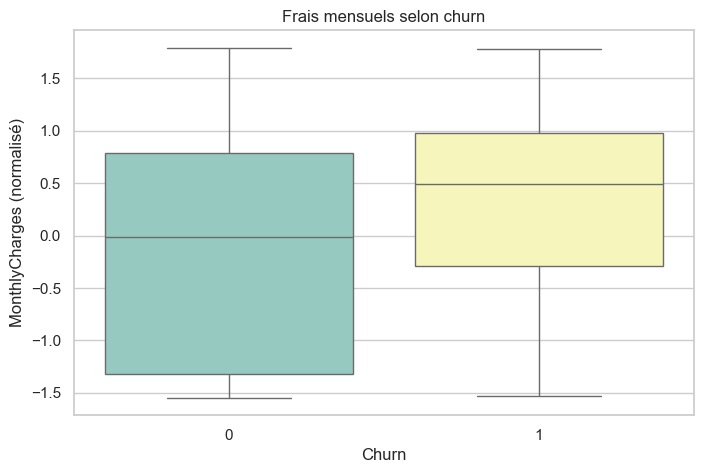


MonthlyCharges moyen :
Churn
0   -0.116036
1    0.320542
Name: MonthlyCharges, dtype: float64

 Interprétation :
Les clients churnés paient en moyenne plus chaque mois. Cela peut indiquer une insatisfaction liée au coût.


In [25]:
# Boxplot : Monthly Charges selon Churn
sns.boxplot(
    data=df, 
    x="Churn", 
    y="MonthlyCharges", 
    hue="Churn",      
    palette="Set3", 
    legend=False       
)
plt.title("Frais mensuels selon churn")
plt.xlabel("Churn")
plt.ylabel("MonthlyCharges (normalisé)")
plt.show()

#  Moyenne
charges_means = df.groupby("Churn")["MonthlyCharges"].mean()
print("\nMonthlyCharges moyen :")
print(charges_means)

# Interprétation
print("\n Interprétation :")
print("Les clients churnés paient en moyenne plus chaque mois. Cela peut indiquer une insatisfaction liée au coût.")


In [24]:
summary = df.groupby("Churn")["MonthlyCharges"].describe()
print(summary)

# Les churners ont une moyenne positive → ils se situent plutôt dans la partie haute de la distribution des charges.
# Les clients restés ont une moyenne négative → ils se situent dans la partie basse de la distribution.
# Donc, plus les MonthlyCharges sont élevés, plus la probabilité de churn augmente.


        count      mean       std       min       25%       50%       75%  \
Churn                                                                       
0      5163.0 -0.116036  1.033597 -1.547283 -1.319586 -0.011575  0.787027   
1      1869.0  0.320542  0.819911 -1.527339 -0.287470  0.493680  0.977329   

            max  
Churn            
0      1.793381  
1      1.780085  


In [51]:
# Calcul taux de churn par type de contrat
for col in ["Contract_One year", "Contract_Two year"]:
    churn_by_contract = df.groupby(col)["Churn"].mean() * 100
    print(f"\nTaux de churn selon {col} :")
    print(churn_by_contract)

# Les clients en contrat 1 an → leur taux de churn chute à 11%.
# Les clients en contrat 2 ans → ils sont presque captifs, avec un churn ultra faible à 2,8%.
# Les clients en month-to-month sont ceux qui churnent le plus ≈ 40%,



Taux de churn selon Contract_One year :
Contract_One year
0    30.629496
1    11.277174
Name: Churn, dtype: float64

Taux de churn selon Contract_Two year :
Contract_Two year
0    34.056480
1     2.848665
Name: Churn, dtype: float64


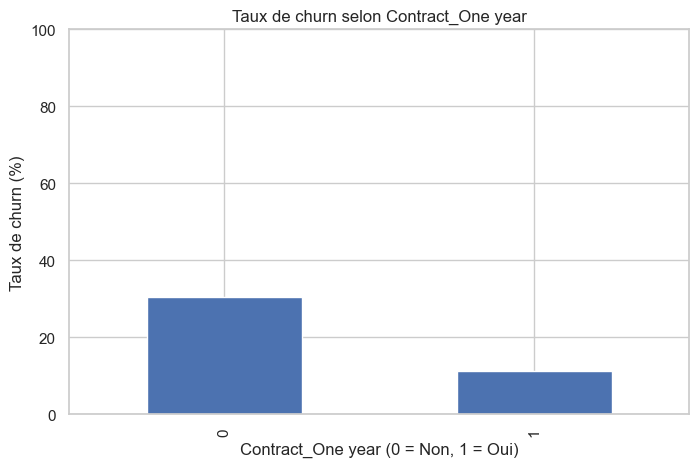


 Interprétation pour Contract_One year :
Les clients avec Contract_One year = 1 ont un taux de churn de 11.3% contre 30.6% pour les autres.


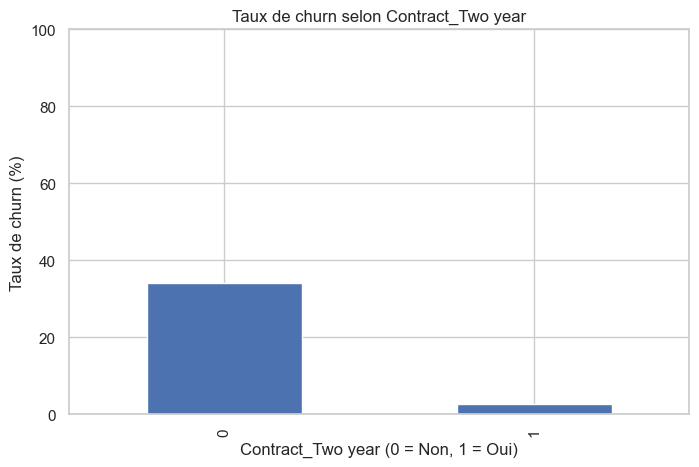


 Interprétation pour Contract_Two year :
Les clients avec Contract_Two year = 1 ont un taux de churn de 2.8% contre 34.1% pour les autres.


In [56]:
# Barplots : Contrats selon Churn
for col in ["Contract_One year", "Contract_Two year"]:
    churn_pct = df.groupby(col)["Churn"].mean() * 100
    churn_pct.plot(kind="bar")
    plt.title(f"Taux de churn selon {col}")
    plt.xlabel(f"{col} (0 = Non, 1 = Oui)")
    plt.ylabel("Taux de churn (%)")
    plt.ylim(0, 100)
    plt.show()

    # Interprétation
    print(f"\n Interprétation pour {col} :")
    print(f"Les clients avec {col} = 1 ont un taux de churn de {round(churn_pct[1], 1)}% contre {round(churn_pct[0], 1)}% pour les autres.")


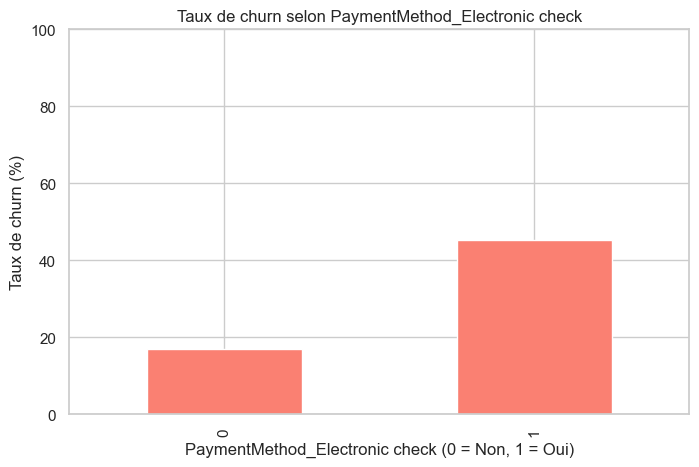


Interprétation pour PaymentMethod_Electronic check :
Les clients ayant choisi cette méthode de paiement ont un churn de 45.3%.


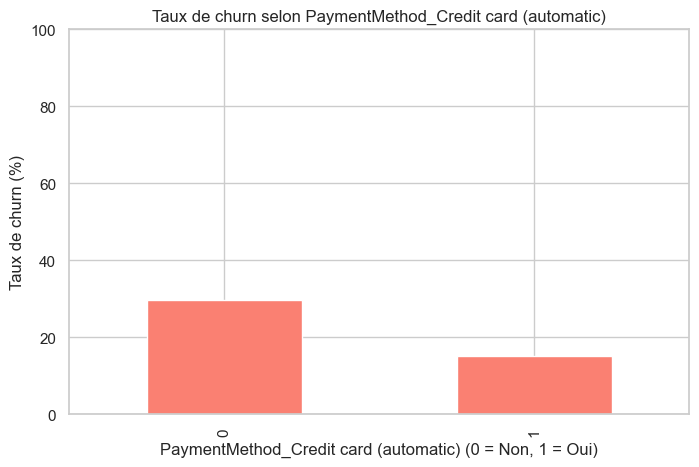


Interprétation pour PaymentMethod_Credit card (automatic) :
Les clients ayant choisi cette méthode de paiement ont un churn de 15.3%.


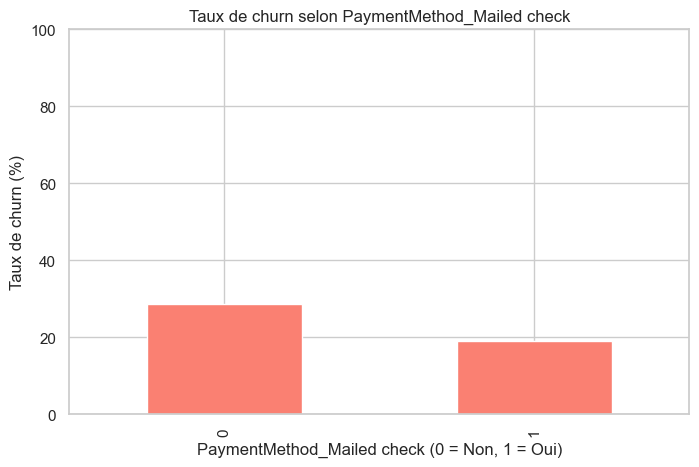


Interprétation pour PaymentMethod_Mailed check :
Les clients ayant choisi cette méthode de paiement ont un churn de 19.2%.


In [26]:
# Barplot : Payment Method selon Churn
for col in [
    "PaymentMethod_Electronic check",
    "PaymentMethod_Credit card (automatic)",
    "PaymentMethod_Mailed check"
]:
    churn_pct = df.groupby(col)["Churn"].mean() * 100
    churn_pct.plot(kind="bar", color="salmon")
    plt.title(f"Taux de churn selon {col}")
    plt.xlabel(f"{col} (0 = Non, 1 = Oui)")
    plt.ylabel("Taux de churn (%)")
    plt.ylim(0, 100)
    plt.show()

    print(f"\nInterprétation pour {col} :")
    print(f"Les clients ayant choisi cette méthode de paiement ont un churn de {round(churn_pct[1], 1)}%.")

# Payment method electronic check (CHURN élevé) => 45,3% => cheque éléctronique => méthode a risque
# Payment method credit card (CHURN faible) => 15,3% => carte bancaire => paiement automoatisé = meilleure fidélité = moins de churn
# Payment method electronic check (CHURN moyen) => 19,2% => chéque postal => méthode intermediaire

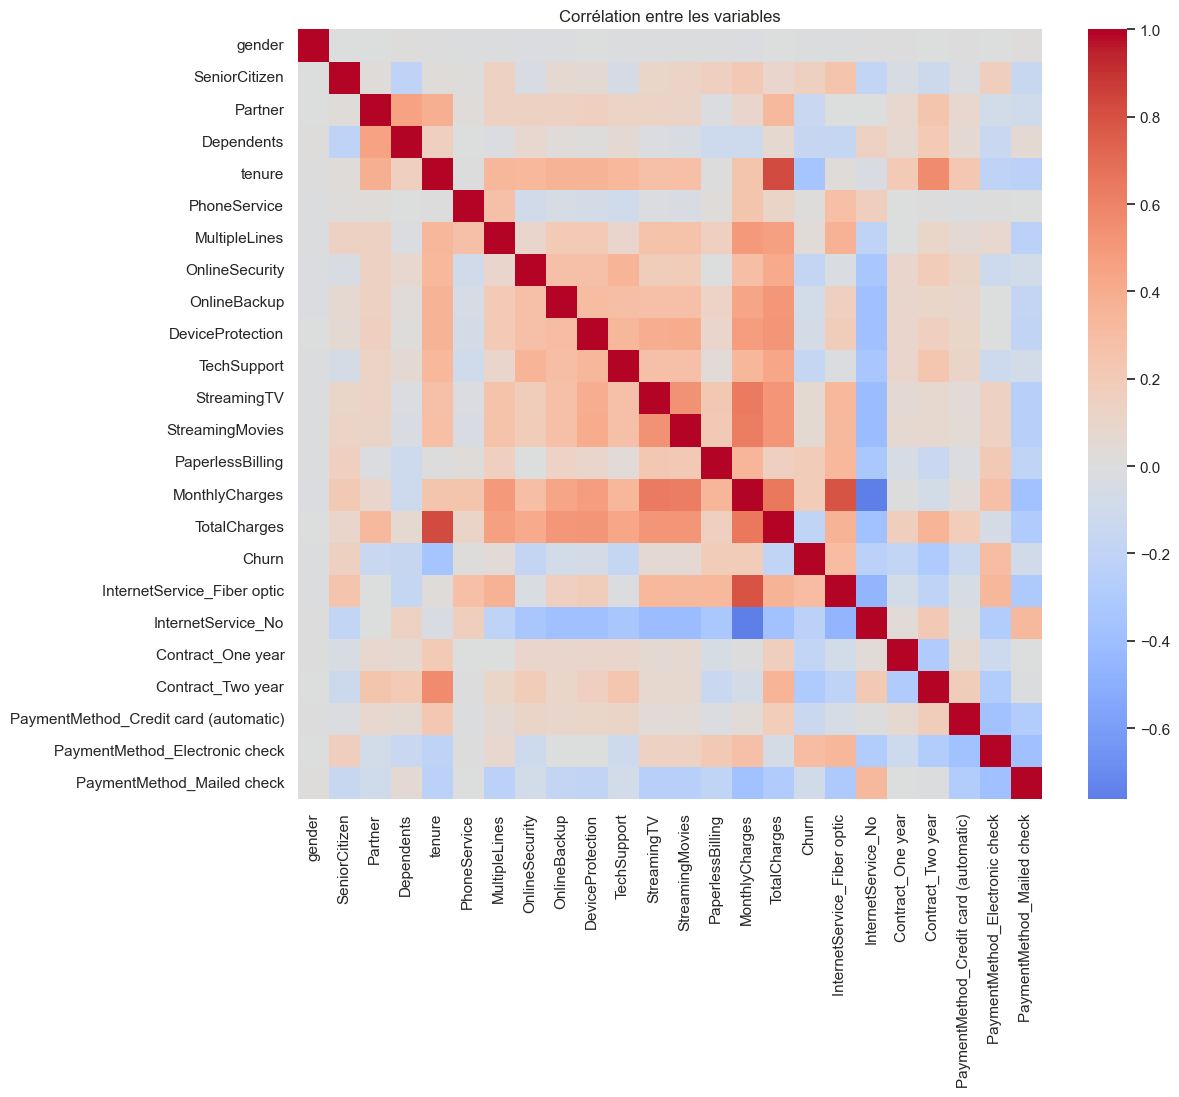

In [58]:
# Heatmap de corrélations
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Corrélation entre les variables")
plt.show()

# Corrélations fortes
# MonthlyCharges <=> TotalCharges = forte corrélation positive
# Tenure <=> TotalCharges =  forte corrélation positive

# Corrélation avec le churn 
# tenure et churn > plus un client est ancien moins il a de chance de churner
# MonthlyCharges et churn > les clients qui âient plus cher sont plus susceptibles de churner

# Corrélations faible
# Le reste des variables sont proches de 0 => variables indépendantes. 

In [60]:
print("Colonnes contenant 'OnlineSecurity' :")
print([col for col in df.columns if 'OnlineSecurity' in col])


Colonnes contenant 'OnlineSecurity' :
['OnlineSecurity']


In [61]:
df[["OnlineSecurity"]].head()


,OnlineSecurity
0,0
1,1
2,1
3,1
4,0


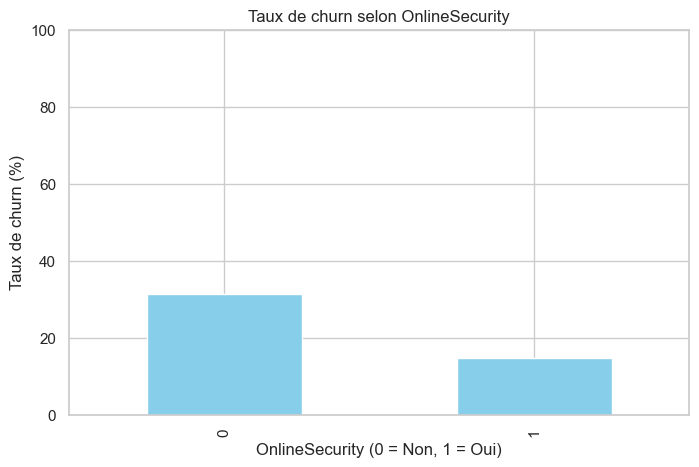


 Interprétation pour OnlineSecurity :
Churn pour clients avec OnlineSecurity = 1 : 14.6% vs 31.4% sans.


In [27]:
# Online security
if "OnlineSecurity_Yes" in df.columns:
    col = "OnlineSecurity_Yes"
elif "OnlineSecurity" in df.columns:
    col = "OnlineSecurity"
else:
    raise ValueError("Colonne OnlineSecurity introuvable")

# Visualisation
churn_pct = df.groupby(col)["Churn"].mean() * 100
churn_pct.plot(kind="bar", color="skyblue")
plt.title(f"Taux de churn selon {col}")
plt.xlabel(f"{col} (0 = Non, 1 = Oui)")
plt.ylabel("Taux de churn (%)")
plt.ylim(0, 100)
plt.show()

# Interprétation
print(f"\n Interprétation pour {col} :")
print(f"Churn pour clients avec {col} = 1 : {round(churn_pct[1], 1)}% vs {round(churn_pct[0], 1)}% sans.")

# Les clients qui n’ont pas activé OnlineSecurity sont beaucoup plus susceptibles de churner.
# Les clients protégés par OnlineSecurity restent plus fidèles.


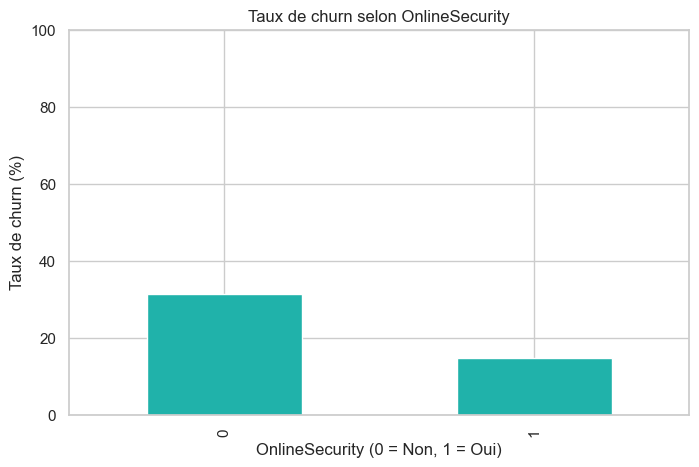


Taux de churn selon OnlineSecurity :
 - OnlineSecurity = 0 ➜ 31.4% de churn
 - OnlineSecurity = 1 ➜ 14.6% de churn

Interprétation :
Les clients sans 'OnlineSecurity' churnent davantage. Sa présence semble être un facteur de fidélité.

------------------------------------------------------------



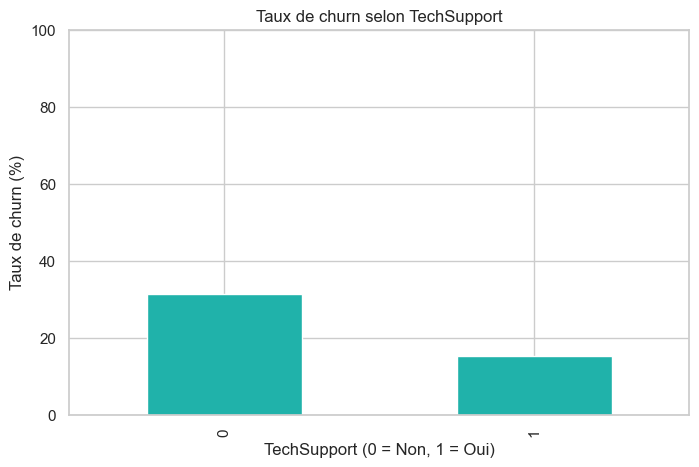


Taux de churn selon TechSupport :
 - TechSupport = 0 ➜ 31.2% de churn
 - TechSupport = 1 ➜ 15.2% de churn

Interprétation :
Les clients sans 'TechSupport' churnent davantage. Sa présence semble être un facteur de fidélité.

------------------------------------------------------------



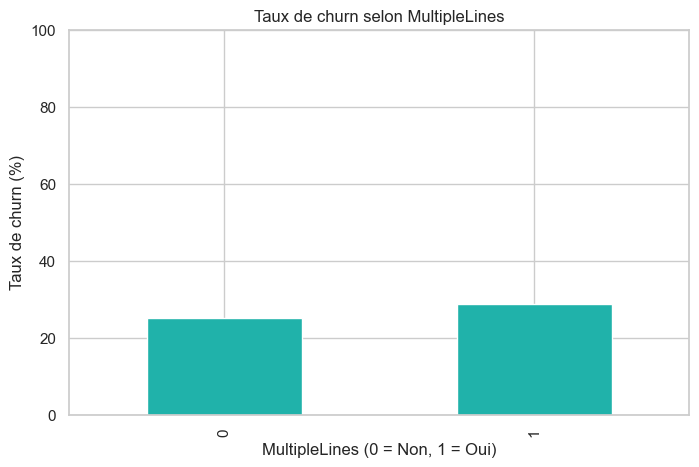


Taux de churn selon MultipleLines :
 - MultipleLines = 0 ➜ 25.1% de churn
 - MultipleLines = 1 ➜ 28.6% de churn

Interprétation :
Les clients ayant 'MultipleLines' (valeur = 1) churnent plus que ceux qui ne l'ont pas.

------------------------------------------------------------



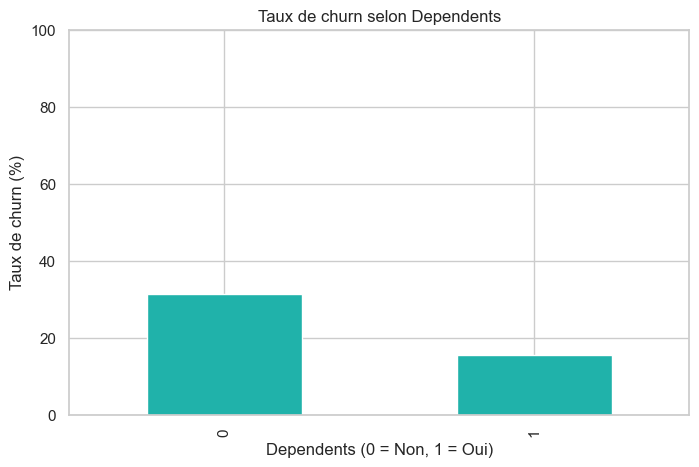


Taux de churn selon Dependents :
 - Dependents = 0 ➜ 31.3% de churn
 - Dependents = 1 ➜ 15.5% de churn

Interprétation :
Les clients sans 'Dependents' churnent davantage. Sa présence semble être un facteur de fidélité.

------------------------------------------------------------



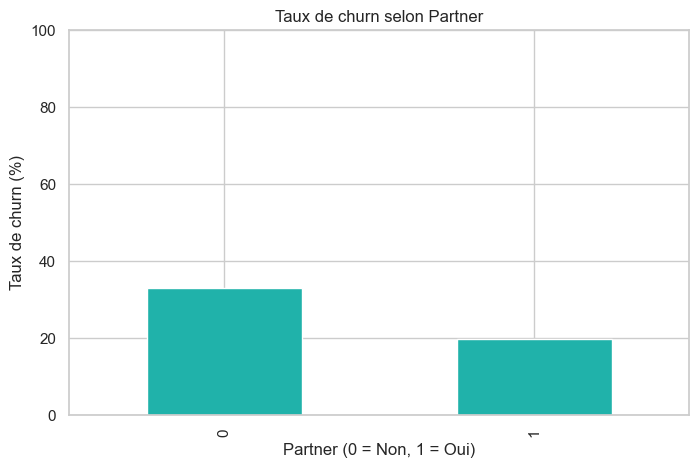


Taux de churn selon Partner :
 - Partner = 0 ➜ 33.0% de churn
 - Partner = 1 ➜ 19.7% de churn

Interprétation :
Les clients sans 'Partner' churnent davantage. Sa présence semble être un facteur de fidélité.

------------------------------------------------------------



In [28]:
# Liste des variables à analyser
binary_variables = ["OnlineSecurity", "TechSupport", "MultipleLines", "Dependents", "Partner"]

for var in binary_variables:
    # Détection automatique de la bonne colonne à utiliser
    if f"{var}_Yes" in df.columns:
        col = f"{var}_Yes"
    elif var in df.columns:
        col = var
    else:
        print(f"Colonne pour {var} non trouvée.")
        continue

    #  Calcul du pourcentage de churn selon la variable
    churn_pct = df.groupby(col)["Churn"].mean() * 100

    # Visualisation
    churn_pct.plot(kind="bar", color="lightseagreen")
    plt.title(f"Taux de churn selon {col}")
    plt.xlabel(f"{col} (0 = Non, 1 = Oui)")
    plt.ylabel("Taux de churn (%)")
    plt.ylim(0, 100)
    plt.show()

    # Affichage des pourcentages
    print(f"\nTaux de churn selon {col} :")
    for value in churn_pct.index:
        print(f" - {col} = {value} ➜ {round(churn_pct[value], 1)}% de churn")

    # Interprétation
    print("\nInterprétation :")
    if churn_pct[1] > churn_pct[0]:
        print(f"Les clients ayant '{var}' (valeur = 1) churnent plus que ceux qui ne l'ont pas.")
    else:
        print(f"Les clients sans '{var}' churnent davantage. Sa présence semble être un facteur de fidélité.")
    print("\n" + "-"*60 + "\n")


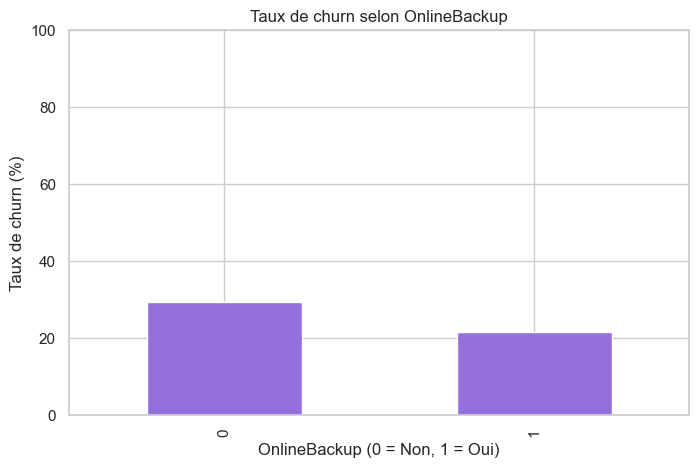


Taux de churn selon OnlineBackup :
 - OnlineBackup = 0 ➜ 29.2% de churn
 - OnlineBackup = 1 ➜ 21.6% de churn

Interprétation :
➤ Les clients **sans** 'OnlineBackup' churnent davantage. Sa présence semble être un facteur de fidélité.

------------------------------------------------------------



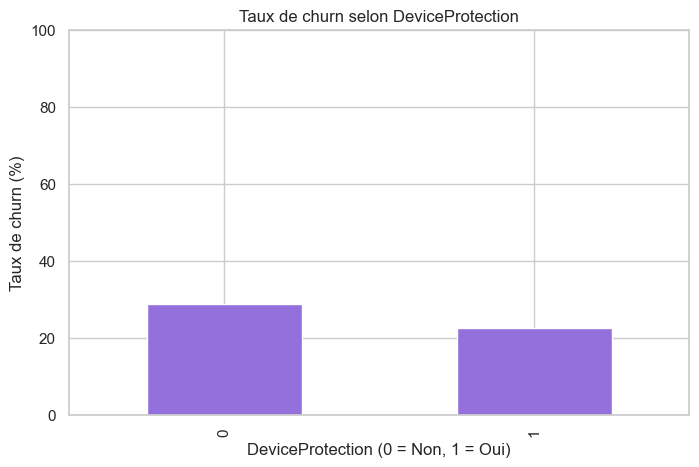


Taux de churn selon DeviceProtection :
 - DeviceProtection = 0 ➜ 28.7% de churn
 - DeviceProtection = 1 ➜ 22.5% de churn

Interprétation :
➤ Les clients **sans** 'DeviceProtection' churnent davantage. Sa présence semble être un facteur de fidélité.

------------------------------------------------------------



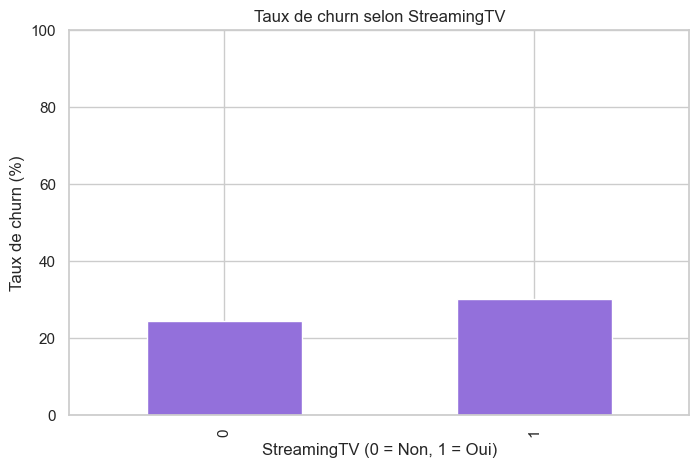


Taux de churn selon StreamingTV :
 - StreamingTV = 0 ➜ 24.4% de churn
 - StreamingTV = 1 ➜ 30.1% de churn

Interprétation :
➤ Les clients avec 'StreamingTV' (1) churnent **plus** que ceux qui ne l'ont pas.

------------------------------------------------------------



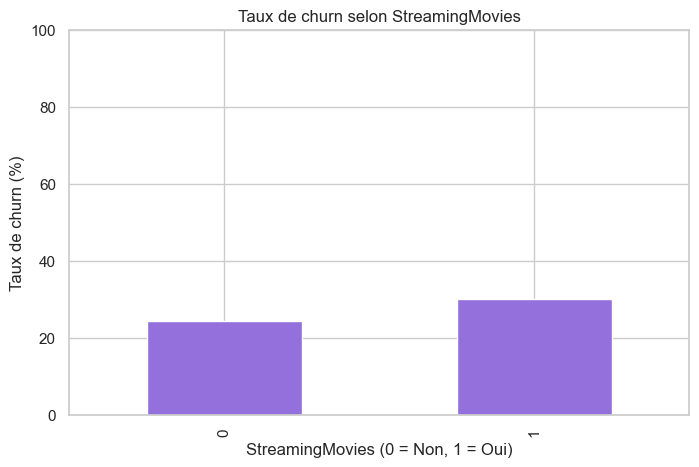


Taux de churn selon StreamingMovies :
 - StreamingMovies = 0 ➜ 24.4% de churn
 - StreamingMovies = 1 ➜ 30.0% de churn

Interprétation :
➤ Les clients avec 'StreamingMovies' (1) churnent **plus** que ceux qui ne l'ont pas.

------------------------------------------------------------



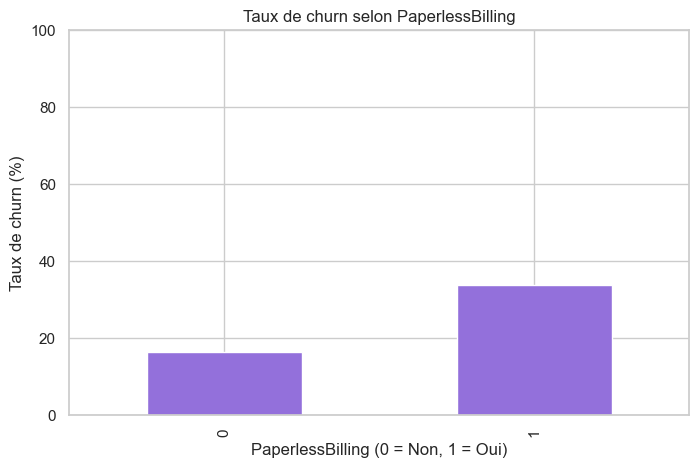


Taux de churn selon PaperlessBilling :
 - PaperlessBilling = 0 ➜ 16.4% de churn
 - PaperlessBilling = 1 ➜ 33.6% de churn

Interprétation :
➤ Les clients avec 'PaperlessBilling' (1) churnent **plus** que ceux qui ne l'ont pas.

------------------------------------------------------------



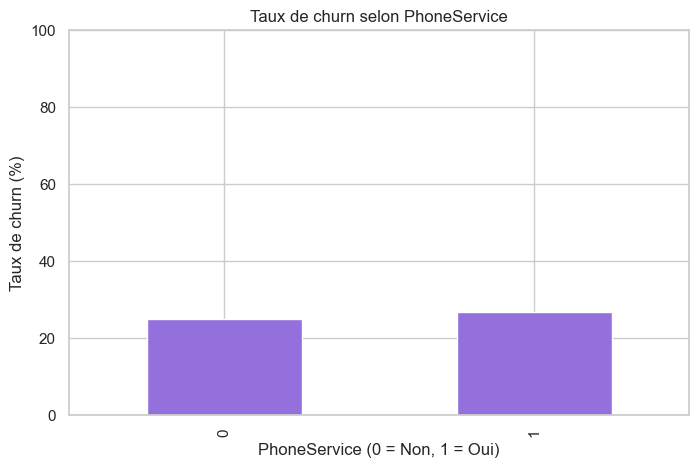


Taux de churn selon PhoneService :
 - PhoneService = 0 ➜ 25.0% de churn
 - PhoneService = 1 ➜ 26.7% de churn

Interprétation :
➤ Les clients avec 'PhoneService' (1) churnent **plus** que ceux qui ne l'ont pas.

------------------------------------------------------------



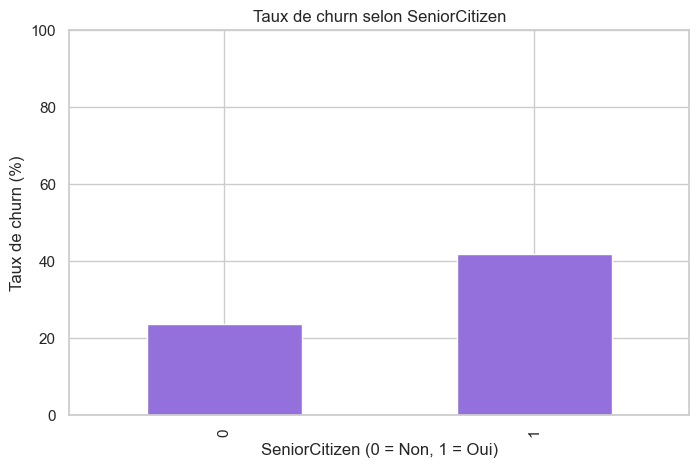


Taux de churn selon SeniorCitizen :
 - SeniorCitizen = 0 ➜ 23.7% de churn
 - SeniorCitizen = 1 ➜ 41.7% de churn

Interprétation :
➤ Les clients avec 'SeniorCitizen' (1) churnent **plus** que ceux qui ne l'ont pas.

------------------------------------------------------------



In [64]:
# Nouvelles variables binaires ou one-hot à analyser
additional_vars = [
    "OnlineBackup",
    "DeviceProtection",
    "StreamingTV",
    "StreamingMovies",
    "PaperlessBilling",
    "PhoneService",
    "SeniorCitizen"
]

for var in additional_vars:
    # Détection automatique selon encodage
    if f"{var}_Yes" in df.columns:
        col = f"{var}_Yes"
    elif var in df.columns:
        col = var
    else:
        print(f"Colonne pour {var} non trouvée.")
        continue

    # Calcul du churn %
    churn_pct = df.groupby(col)["Churn"].mean() * 100

    # Graphique
    churn_pct.plot(kind="bar", color="mediumpurple")
    plt.title(f"Taux de churn selon {col}")
    plt.xlabel(f"{col} (0 = Non, 1 = Oui)")
    plt.ylabel("Taux de churn (%)")
    plt.ylim(0, 100)
    plt.show()

    # Affichage des valeurs
    print(f"\nTaux de churn selon {col} :")
    for value in churn_pct.index:
        print(f" - {col} = {value} ➜ {round(churn_pct[value], 1)}% de churn")

    # Interprétation
    print("\nInterprétation :")
    if churn_pct[1] > churn_pct[0]:
        print(f"➤ Les clients avec '{var}' (1) churnent **plus** que ceux qui ne l'ont pas.")
    else:
        print(f"➤ Les clients **sans** '{var}' churnent davantage. Sa présence semble être un facteur de fidélité.")
    print("\n" + "-"*60 + "\n")


In [65]:
## Les clients sans facture papier churnent plus, peut-être par manque d’interaction physique.
## Le service TV n’empêche pas le churn, peut-être parce que ce n’est pas un facteur de fidélité.